# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [7]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [8]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    N = len(Y)
    loss = 0
    for i in range(N):
        loss += np.square(Y[i] - np.dot(w,np.transpose(X[i,:])))
    return loss

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    #==============================================
    # TODO: Implement the gradient of the loss function.
    #==============================================    
    return -2 * (y - np.dot(w,x)) * x

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    
    N = len(Y) 
    D = len(w_start)
    w = w_start 
    losses = np.zeros(N_epochs)
    for t in range(N_epochs):
        order = np.random.permutation(N)
        for i in order:
            w = w - eta * gradient(X[i,:], Y[i], w)
        losses[t] = loss(X, Y, w)
    return (w, losses)

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [9]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [10]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set1/data/sgd_data.csv')

eta = np.e ** -15
N = len(data)
D = len(data[0]) - 1
X = np.ones((N, D + 1))
X[:,1:] = data[:,:D]
Y = data[:,D]
w_start = 0.001 * np.ones(5)
N_epochs = 1000

w, _ = SGD(X, Y, w_start, eta, N_epochs)
print(w)

[ -0.22789859  -5.97853623   3.98838947 -11.85700625   8.91129767]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

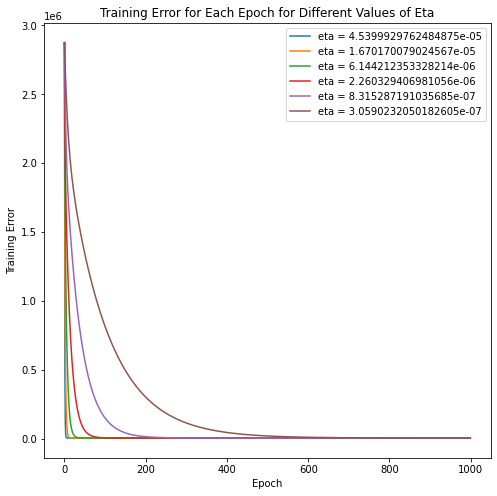

In [11]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================
etas = [np.e ** -x for x in range(10,16)]

plt.figure(figsize=(8,8))

for eta in etas:
    w = w_start
    losses = np.zeros(N_epochs)
    for t in range(N_epochs):
        losses[t] = loss(X, Y, w)
        order = np.random.permutation(N)
        for i in order:
            w = w - eta * gradient(X[i,:], Y[i], w)
    plt.plot(losses, label=f'eta = {eta}')

plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error for Each Epoch for Different Values of Eta')
plt.show()

## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [12]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================
A = np.zeros((D + 1, D + 1))
B = np.zeros(D + 1)

for i in range(N):
    x = X[i,:]
    A += np.outer(x,x)
    B += x * Y[i]
w = np.matmul(np.linalg.inv(A), B)
print(w)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
